In [110]:
%cd /content/drive/MyDrive/Heart_Attack_Prediction


/content/drive/MyDrive/Heart_Attack_Prediction


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()


In [112]:
heart_data=pd.read_csv('/content/drive/MyDrive/Heart_Attack_Prediction/heart.csv')
heart_data.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [113]:
categorical_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
numerical_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
heart_data['cp'].value_counts().unique()

array([143,  87,  50,  23])

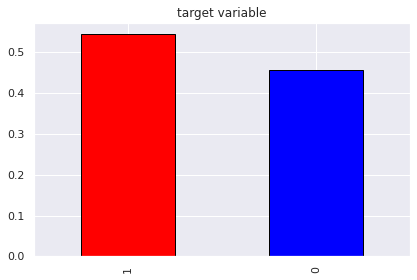

In [114]:
# Around 55% people have more chances to get heart attack
# Around 45% people have less chances to get heart attack

heart_data['output'].value_counts(normalize=True).plot.bar(color=['red','blue'],edgecolor='black',title='target variable')


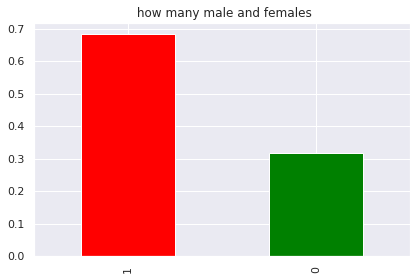

In [115]:
# Around 68 % people are with sex=1
# Around 30 % people are with sex=0
heart_data['sex'].value_counts(normalize=True).plot.bar(color=['red','green'],title=' how many male and females')


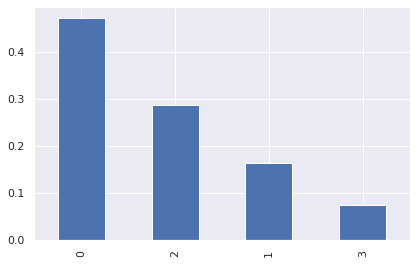

In [116]:
# Around 50 % of the people have chest pain type: Typical Angina
# Around 28 % of the people have chest pain type: Non-anginal Pain
# Around less than 20 % of the people have chest pain type: Atypical Angina
# Around less than 10% of the people have chest pain type: Asymptomatic
heart_data['cp'].unique()
heart_data['cp'].value_counts(normalize=True).plot.bar()

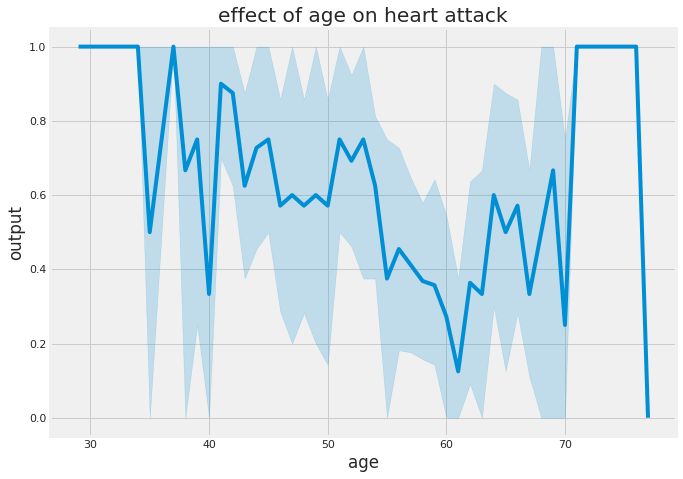

In [117]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("effect of age on heart attack")
sns.lineplot(x=heart_data['age'],y=heart_data['output'])

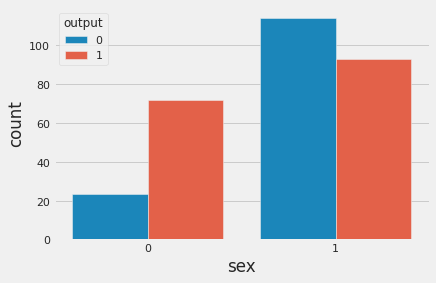

In [118]:
sns.countplot(data=heart_data ,x=heart_data['sex'],hue='output')

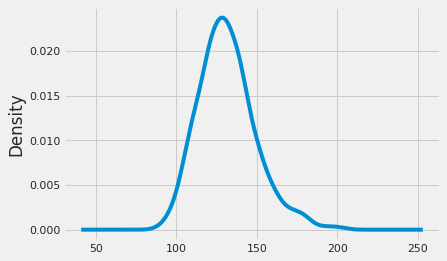

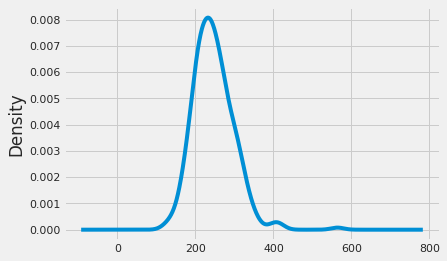

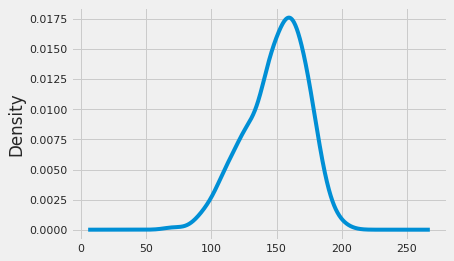

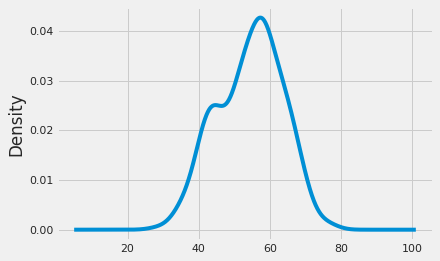

In [138]:

heart_data['trtbps'].plot(kind='density')
plt.show()

heart_data['chol'].plot(kind='density')
plt.show()
heart_data['thalachh'].plot(kind='density')
plt.show()
heart_data['age'].plot(kind='density')
plt.show()

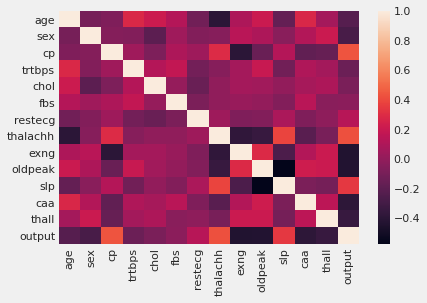

In [120]:
correla=heart_data.corr()
sns.heatmap(correla)

In [131]:
x=heart_data.drop(['output'],axis=1)
y=heart_data['output']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [122]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x)
scaled_data=scalar.transform(x)
scaled_data=pd.DataFrame(scaled_data,columns=['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall'])
scaled_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [123]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [124]:
logistic=LogisticRegression()
logistic.fit(x_train,y_train)
predicted=logistic.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [125]:
logistic.score(x_test,y_test)

0.8032786885245902

In [126]:
logistic.score(x_train,y_train)

0.859504132231405

In [127]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_Mat=confusion_matrix(y_test,predicted)


In [128]:
accuracy=accuracy_score(y_test,predicted)

In [129]:
accuracy

0.8032786885245902